### 1.3 Классы и объекты

Методы обращения к классу и его атрибутам
- getattr(obj, name[, default]) - возвращает значение атрибута объекта;
- hasattr(obj, name) - проверяет на наличие атрибута name в obj;
- setattr(obj, name, value) - задает значение атрибута (если атрибут не существует, то он создаётся);
- delattr(obj, name) - удаляет атрибут с именем name в obj

Служебные команды
- \_\_doc\_\_ - содержит строку с описанием класса;
- \_\_dict\_\_ - содержит набор атрибутов экземпляра класса;

    class Car:
        mark = chevrolet
        color = blue

    Car.color
    -> blue
    
    Car.color = yellow
    Car.color
    -> yellow

In [ ]:
def str_to_attr():
    """Преобразует атрибуты в задании к виду
    аттрибутов для класса"""
    def count_colon(el, count_col, count_quot_m, count_space):
        # проверка на :
        if el == ':':
            count_col += 1
            el = ' ='
        # для игнорирования ' ' между ""    
        if el == '"' or el == "'":
            count_quot_m += 1
        # если : и не между " "
        if count_col and count_quot_m % 2 == 0:
            if el == ' ':
                count_space += 1    
                if count_space % 2 == 0:
                    el = '\n'
                
        return el, count_col, count_quot_m, count_space
    
    
    task_str = input()
    lines = ''
    count_col = 0
    count_quot_m = 0
    count_space = 0
    
    print()
    for i in range(len(task_str)):
        el, count_col, count_quot_m, count_space = (
            count_colon(task_str[i], count_col, count_quot_m, count_space)
        )
        
        if el == '\n':
            print(4*' ' + lines)
            lines = ''
        else:
            lines += el
    else:
        print(4*' ' + lines)


str_to_attr()

In [ ]:
class Car:
    pass


setattr(Car, 'model', 'Тойота')
setattr(Car, 'color', 'Розовый')
setattr(Car, 'number', 'П111УУ77')
print(Car.__dict__['color'])

In [ ]:
class Notes:
    uid = 1005435
    title = "Шутка"
    author = "И.С. Бах"
    pages = 2
   
print(getattr(Notes, 'author'))

In [ ]:
class Dictionary: 
    rus = "Питон"
    eng = "Python"

print(getattr(Dictionary, 'rus_word', False))

In [ ]:
class TravelBlog:
    total_blogs = 0

tb1 = TravelBlog()
setattr(tb1, 'name', 'Франция')
setattr(tb1, 'days', 6)
setattr(TravelBlog, 'total_blogs', 1)
tb2 = TravelBlog()
setattr(tb2, 'name', 'Италия')
setattr(tb2, 'days', 5)
TravelBlog.total_blogs += 1

In [ ]:
class Figure:
    type_fig = 'ellipse'
    color = 'red'

fig1 = Figure()
setattr(fig1, 'start_pt', (10, 5))
setattr(fig1, 'end_pt', (100, 20))
setattr(fig1, 'color', 'blue')
delattr(fig1, 'color')
print(' '.join(fig1.__dict__.keys()))

In [ ]:
class Person:
    name = 'Сергей Балакирев'
    job = 'Программист'
    city = 'Москва'

p1 = Person()
print('job' in p1.__dict__)

In [ ]:
class Point:
    tp = '1'

del Point.tp

In [ ]:
Point.__dict__

### 1.4 Методы классов

self

In [ ]:
class MediaPlayer:
    def open(self, file):
        self.filename = file

    
    def play(self):
        print(f'Воспроизведение {self.filename}')


media1 = MediaPlayer()
media2 = MediaPlayer()

media1.open('filemedia1')
media2.open('filemedia2')

media1.play()
media2.play()

In [ ]:
MediaPlayer.play(media1)

Задание 2

In [ ]:
class Graph:
    LIMIT_Y = [0, 10]

    
    def set_data(self, data):
        self.data = data

    
    def draw(self):
        left, right = self.LIMIT_Y
        res = filter(lambda x: left <= x <= right, self.data)
        print(*res)


graph_1 = Graph()
graph_1.set_data([10, -5, 100, 20, 0, 80, 45, 2, 5, 7])
graph_1.draw()

In [ ]:
import sys

class StreamData:
    def create(self, fields, lst_values):
        if len(fields) != len(lst_values):
            return False

        self.__dict__ = dict(zip(fields, lst_values))
        return True

        
class StreamReader:
    FIELDS = ('id', 'title', 'pages')

    def readlines(self):
        lst_in = list(map(str.strip, sys.stdin.readlines()))  # считывание списка строк из входного потока
        sd = StreamData()
        res = sd.create(self.FIELDS, lst_in)
        return sd, res


sr = StreamReader()
data, result = sr.readlines()

Задание 4

In [ ]:
import sys

# программу не менять, только добавить два метода
lst_in = list(map(str.strip, sys.stdin.readlines()))  # считывание списка строк из входного потока
lst_in = ['1 Сергей 35 120000', '2 Федор 23 12000', '3 Иван 13 1200']

class DataBase:
    lst_data = []
    FIELDS = ('id', 'name', 'old', 'salary')

    # здесь добавлять методы
    def insert(self, data):
        for el in data:
            res = dict(zip(self.FIELDS, el.split()))
            self.lst_data.append(res)


    def select(self, a, b):
        return self.lst_data[a:b+1]


db = DataBase()
db.insert(lst_in)
db.select(1, 2)

Задание 5. Переводчик

Доработать, добавить БД для сохранения данных.

In [ ]:
class Translator:
    def add(self, eng, rus):
        if 'tr' not in self.__dict__:
            self.tr = {}

        self.tr.setdefault(eng, [])
        if rus not in self.tr[eng]:
            self.tr[eng].append(rus)
            

    def remove(self, eng):
        self.tr.pop(eng, False)

    
    def translate(self, eng):
        return self.tr[eng]


tr = Translator()
tr.add("tree", "дерево")
tr.add("car", "машина")
tr.add("car", "автомобиль")
tr.add("leaf", "лист")
tr.add("river", "река")
tr.add("go", "идти")
tr.add("go", "ехать")
tr.add("go", "ходить")
tr.add("milk", "молоко")
tr.remove('car')
print(*tr.translate('go'))

### 1.5 Инициализатор \_\_init\_\_ и финализатор \_\_del\_\_

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect('example.db')
cursor = conn.cursor()


In [ ]:
class Point:
    color = 'red'
    circle = 2

    def __init__(self):
        print('вызов __init__')
        self.x = 0
        self.y = 0

    def set_coords(self, x, y):
        self.x = x
        self.y = y

    def get_coords(self):
        return self.x, self.y


pt = Point()
pt.set_coords(1, 2)
print(pt.__dict__)

In [ ]:
class Point:
    def __init__(self, x, y, color='black'):
        self.x = x
        self.y = y
        self.color = color

points = []
for num, i in enumerate(range(1, 2000, 2), 1):
    points.append(Point(i, i))

points[1].color = 'yellow'

In [ ]:
points[1].color

Задание 4

In [ ]:
import random

class Line:
    def __init__(self, a, b, c, d):
        self.sp = a, b,
        self.ep = c, d,


class Rect:
    def __init__(self, a, b, c, d):
        self.sp = a, b,
        self.ep = c, d,


class Ellipse:
    def __init__(self, a, b, c, d):
        self.sp = a, b,
        self.ep = c, d,        


def add_obj():
    coords = [random.randint(-100, 100) for i in range(4)]
    return random.choice([Line, Rect, Ellipse])(*coords)


def line_to_zero(obj):
    if type(obj).__name__ == 'Line':
        obj.__init__(0, 0, 0, 0)
    return obj    


elements = [add_obj() for i in range(217)]
elements = [line_to_zero(el) for el in elements]

Подвиг 5

In [ ]:
class TriangleChecker:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

        
    def is_triangle(self):
        lst = [self.a, self.b, self.c]
        # 1
        for el in lst:
            if (
                type(el) != int and
                type(el) != float
            ):
                return 1
            elif el <= 0:
                return 1
        # 2, 3
        if (self.a + self.b > self.c and
            self.b + self.c > self.a and
            self.a + self.c > self.b):  
            return 3
        else:
            return 2


a, b, c = map(int, input().split())        
tr = TriangleChecker(a, b, c)
print(tr.is_triangle())

In [ ]:
tests = [[3, 4, 5], [5, 4, 3], [4, 3, 5], [1, 1, 1], [1, 7, 8]]
for el in tests:
    tr_t = TriangleChecker(*el)
    print(tr_t.is_triangle())

Подвиг 6

In [ ]:
class Graph:
    def __init__(self, data, is_show=True):
        self.data = data.copy()
        self.is_show = is_show


    def set_data(self, data):
        self.data = data.copy()


    def show_table(self):
        if self.is_show:
            print(*self.data)
        else:
            print('Отображение данных закрыто')
        

    def show_graph(self):
        if self.is_show:
            print(f'Графическое отображение данных: {self.data}')
        else:
            print('Отображение данных закрыто')

    
    def show_bar(self):
        if self.is_show:
            print('Столбчатая диаграмма:', *self.data)
        else:
            print('Отображение данных закрыто')

    
    def set_show(self, fl_show):
        self.is_show = fl_show


# data_graph = list(map(int, input().split()))
data_graph = [8, 11, 10, -32, 0, 7, 18]
gr = Graph(data_graph)
gr.show_bar()
gr.set_show(fl_show=False)
gr.show_table()

Подвиг 7

In [ ]:
class CPU:
    def __init__(self, name, fr):
        self.name = name
        self.fr = fr    
    
    
class Memory:
    def __init__(self, name, volume):
        self.name = name
        self.volume = volume
        
    
class MotherBoard:
    def __init__(self, name, cpu, mem_slots):
        self.name = name
        self.cpu = cpu
        self.total_mem_slots = 4
        self.mem_slots = mem_slots


    def get_config(self):
        lst = [f'{mem.name} - {mem.volume}' for mem in self.mem_slots]
        return [f'Материнская плата: {self.name}',
                f'Центральный процессор: {self.cpu.name}, {self.cpu.fr}',
                f'Слотов памяти: {self.total_mem_slots}',
                f'Память: {"; ".join(lst)}'
                
               ]

cpu = CPU('asus', 3333)
mem1 = Memory('Kingston', 6777)
mem2 = Memory('Kingston', 6777)
mb = MotherBoard('Aurus', cpu, [mem1, mem2])
mb.get_config()

Подвиг 8

In [ ]:
class Cart:
    def __init__(self, goods=[]):
        self.goods = goods


    def add(self, gb):
        self.goods.append(gb)

    
    def remove(self, indx):
        self.goods.pop(indx)


    def get_list(self):
        return [f"{product.name}: {product.price}" for product in self.goods]
        

class Table:
    def __init__(self, name, price):
        self.name = name
        self.price = price
        
    
class TV:
    def __init__(self, name, price):
        self.name = name
        self.price = price


class Notebook:
    def __init__(self, name, price):
        self.name = name
        self.price = price


class Cup:
    def __init__(self, name, price):
        self.name = name
        self.price = price


tv1 = TV('Samsung', 23000)
tv2 = TV('Philips', 23500)
table = Table('Atlant', 7000)
notebook1 = Notebook('Asus', 125000)
notebook2 = Notebook('Dell', 120000)
cup = Cup('Sun', 230)

cart = Cart()
for el in [tv1, tv2, table, notebook1, notebook2, cup]:
    cart.add(el)

cart.get_list()    

Подвиг 9 

In [ ]:
class ListObject:
    
    def __init__(self, data, next_obj=None):
        self.data = data
        self.next_obj = next_obj

    def link(self, obj):
        self.next_obj = obj


lst_in = ['1. Первые шаги в ООП',
          '1.1 Как правильно проходить этот курс',
          '1.2 Концепция ООП простыми словами',
          '1.3 Классы и объекты. Атрибуты классов и объектов',
          '1.4 Методы классов. Параметр self',
          '1.5 Инициализатор init и финализатор del',
          '1.6 Магический метод new. Пример паттерна Singleton',
          '1.7 Методы класса (classmethod) и статические методы (staticmethod)']    

head_obj = ListObject(lst_in[0], next_obj=ListObject(lst_in[1]))
any_obj = head_obj.next_obj
# next_obj = ListObject.next_obj

# current = 0
# following = 1

# def res(current=0, following=1):
#     head_obj = ListObject(lst_in[current], ListObject(lst_in[following]))
#     if following < len(lst_in):
#         current += 1
#         following += 1
#         res(current, following)
        
#     return head_obj
print(any_obj.__dict__)
for i in range(1, len(lst_in) - 1):
    any_obj.link(ListObject(lst_in[i+1]))
    any_obj = any_obj.next_obj
    print(any_obj.__dict__)
    # var = lst_in[i+2] if i+2 <= len(lst_in) else None
    

In [ ]:
head_obj = ListObject(lst_in[0], next_obj=ListObject(lst_in[1]))
head_obj.next_obj.link(ListObject(lst_in[2]))
head_obj.next_obj.next_obj.link(ListObject(lst_in[3]))

In [ ]:
head_obj = ListObject(lst_in[0], next_obj=ListObject(lst_in[1]))
any_obj = head_obj.next_obj

for i in range(1, 6):
    any_obj.link(ListObject(lst_in[i+1]))
    any_obj = any_obj.next_obj


Большой подвиг 10. Написать Сапёр

In [ ]:
from random import randint

class Cell:
    def __init__(self, mine=False, around_mines=0, fl_open=False):
        self.around_mines = around_mines
        self.mine = mine
        self.fl_open = fl_open
    

class GamePole:
    def __init__(self, N, M):
        self.N = N
        self.M = M
        self.init()

        
    def init(self):
        # creating mine coordinates
        self.mines_positions = self.create_mine_coords()
        # creating pole
        self.pole = self.create_game_pole()


    def create_mine_coords(self):
        M, N = self.M, self.N
        mines_positions = set()
        while len(mines_positions) < M:
            mines_positions.add(tuple(map(randint, [0, 0], [N-1, N-1])))
        return mines_positions


    def create_game_pole(self):
        N = self.N
        mines_positions = self.mines_positions
        game_pole = []
        for i in range(N):
            line = []
            for j in range(N):
                mine = False
                if (i, j) in mines_positions:
                    mine = True
                around_mines = self.how_mines((i, j), mines_positions)
                c1 = Cell(mine, around_mines)
                line.append(c1)
            game_pole.append(line)
                    
        return game_pole

    
    def how_mines(self, cell_coord, mines_positions, cube=3):
        #benchmark
        bm = cell_coord[0] - 1, cell_coord[1] - 1
        
        around_mines = 0
        for i in range(bm[0], cube+bm[0]):
            for j in range(bm[1], cube+bm[1]):
                if (i, j) != cell_coord:
                    if (i, j) in mines_positions:
                        around_mines += 1
    
        return around_mines

    
    def play(self):
        N = self.N
        print('Если хотите прекратить игру, наберите n')
        print(f'Введите координаты в диапазоне:\n'
              f'x: 1-{N}\n'
              f'y: 1-{N}\n'
             )
        self.show()
        while True:
            user_request = input()
            if user_request != 'n':
                x, y = map(int, user_request.split())
                pole_game.pole[x-1][y-1].fl_open = True
                self.show()
                if pole_game.pole[x-1][y-1].mine == True:
                    print('Game over')
                    break
            else:
                break
        
            
    def show(self):
        for line in self.pole:
            for el in line:
                if el.fl_open == False:
                    print('#', end=' ')
                elif el.fl_open == True: 
                    print(['*', el.around_mines][el.mine == False], end=' ')
            print('')
            

N = 10
M = 12
pole_game = GamePole(N, M)
# pole_game.show()

In [ ]:
# pole_game.play()

### 1.6 Магический метод \_\_new\_\_

In [ ]:
class Point:
    def __new__(cls, *args, **kwargs):
        print('вызов __new__ для ' + str(cls))


    def __init__(self, x=0, y=0):
        print('вызов __init__ для ' + str(self))
        self.x = x
        self.y = y


pt = Point(1, 2)
print(pt)

Что проитсходит:
* cls ссылается на класс
* init ссылается на экземпляр класса
* в такой конструкции при создании экземпляра класса, pt не ссылается на экземпляр

Что делать?
* \_\_new\_\_ должен возвращать адрес нового созданного объекта
* вернем адрес нового созданного объекта из **базового класса**
* `super().__new__(cls)`

In [ ]:
class Point:
    def __new__(cls, *args, **kwargs):
        print('вызов __new__ для ' + str(cls))
        return super().__new__(cls)

    def __init__(self, x=0, y=0):
        print('вызов __init__ для ' + str(self))
        self.x = x
        self.y = y


pt = Point(1, 2)
print(pt)

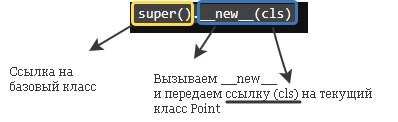

с версии Python 3.0 все классы автоматически и не явно наследуются от базового класса object

Подвиг 6

In [ ]:
class AbstractClass:
    def __new__(cls, *args, **kwargs):
        return "Ошибка: нельзя создавать объекты абстрактного класса"


AbstractClass()

Подвиг 7

In [ ]:
class SingletonFive:
    __instance = None
    __count = 0

    def __new__(cls, *args, **kwargs):
        if cls.__count != 5:
            cls.__count += 1
            cls.__instance = super().__new__(cls)
        return cls.__instance

        
    def __init__(self, name):
        self.name = name


objs = [SingletonFive(str(n)) for n in range(10)] # эту строчку не менять
objs

Подвиг 8

In [ ]:
TYPE_OS = 1 # 1 - Windows; 2 - Linux

class DialogWindows:
    name_class = "DialogWindows"


class DialogLinux:
    name_class = "DialogLinux"


class Dialog:
    __obj_class = None
    
    def __new__(cls, *args, **kwargs):
        obj = DialogWindows() if TYPE_OS == 1 else DialogLinux()
        setattr(obj, 'name', *args)
        return obj
    

dlg = Dialog('test')
dlg.name

In [ ]:
dlg.__dict__

Подвиг 9

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def clone(self):
        return Point(self.x, self.y)


x = 5
y = 5
pt = Point(x, y)
pt_clone = pt.clone()

Подвиг 10

In [ ]:
# Здесь объявляется класс Factory
class Factory:
    def build_sequence(self):
        return []

    def build_number(self, string):
        return float(string)


class Loader:
    def parse_format(self, string, factory):
        seq = factory.build_sequence()
        for sub in string.split(","):
            item = factory.build_number(sub)
            seq.append(item)

        return seq


# эти строчки не менять!
ld = Loader()
s = input()
res = ld.parse_format(s, Factory())

In [ ]:
a = {1, 2, 3}
type(a)

### 1.7 Методы класса (classmethod) и статические методы (staticmethod)

In [ ]:
class Vector:
    MIN_COORD = 0
    MAX_COORD = 100

    # @classmethod работает с объектом класса, а не с экземпляром,
    # аргумент cls(ссылка на текущий класс Vector) указывает на это
    # Когда указывать @classmethod? - если предполагается определить метод, 
    # который будет работать только с атрибутами класса
    @classmethod
    def validate(cls, arg):
        return cls.MIN_COORD <= arg <= cls.MAX_COORD

    def __init__(self, x, y):
        self.x = self.y = 0
        # можно указывать self.validate(x) или Vector.validate(x)
        # self нужно для того, чтобы при изменении имени класса
        # задумка программиста работала. Т.е. self ссылается на 
        # текущий экземпляр класса, который также содержит информацию о классе
        if self.validate(x) and self.validate(y):
            self.x = x
            self.y = y

    def get_coord(self):
        return self.x, self.y

    # это метод который не имеет доступа ни к атрибута класса
    # ни к атрибутам экземпляра. Это самостоялтельная функция, 
    # объявленная внутри класса. 
    # Когда использовать - если нам необходимо определить некоторую
    # сервисную функцию, которая работает с параметрами, которые мы 
    # определяем непосредственно в ней
    @staticmethod
    def norm2(x, y):
        return x*x + y*y


v1 = Vector(1, 2)
# при обращении к classmethod не надо указывать ссылку на 
# объект классса, так как classmethod работает с классом
print(Vector.validate(5))

In [ ]:
class Stepik:
    def get_certificate(self):
        return False


st = Stepik()
commands = [st.get_certificate(), Stepik.get_certificate(st)]
for com in commands:
    print(com)

Подвиг 6

In [ ]:
class Factory:
    @staticmethod
    def build_sequence():
        return []

    @staticmethod
    def build_number(string):
        return int(string)


class Loader:
    @staticmethod
    def parse_format(string, factory):
        seq = factory.build_sequence()
        for sub in string.split(","):
            item = factory.build_number(sub)
            seq.append(item)

        return seq


res = Loader.parse_format("4, 5, -6", Factory)
res


Если в классе не прописывать self, который должен ссылаться на экземпляр класса, то при создании экземпляра класса и вывозве его метода будет возникать ошибка

In [ ]:
Factory.build_number('3')

In [ ]:
a = Factory()
try:
    print(a.build_number('3'))
except TypeError as er:
    print('Ошибка:\nTypeError:', er)

Подвиг 7

In [ ]:
from string import ascii_lowercase, digits

# здесь объявляйте классы TextInput и PasswordInput
class TextInput:
    CHARS = "абвгдеёжзийклмнопрстуфхцчшщьыъэюя " + ascii_lowercase
    CHARS_CORRECT = CHARS + CHARS.upper() + digits
    @classmethod
    def check_name(cls, name):
        check_len = 3 <= len(name) <= 50
        check_symb = len(set(cls.CHARS_CORRECT) & set(name)) > 0
        return check_len and check_symb
    
    def __init__(self, name, size=10):
        self.name = name
        self.size = size
        if not self.check_name(name):
            raise ValueError("некорректное поле name")

    def get_html(self):
        return f"<p class='login'>{self.name}: <input type='text' size={self.size} />"
        

class PasswordInput:
    CHARS = "абвгдеёжзийклмнопрстуфхцчшщьыъэюя " + ascii_lowercase
    CHARS_CORRECT = CHARS + CHARS.upper() + digits
    @classmethod
    def check_name(cls, name):
        check_len = 3 <= len(name) <= 50
        check_symb = len(set(cls.CHARS_CORRECT) & set(name)) > 0
        return check_len and check_symb
    
    def __init__(self, name, size=10):
        self.name = name
        self.size = size
        if not self.check_name(name):
            raise ValueError("некорректное поле name")

    def get_html(self):
        return f"<p class='password'>{self.name}: <input type='text' size={self.size} />"


class FormLogin:
    def __init__(self, lgn, psw):
        self.login = lgn
        self.password = psw

    def render_template(self):
        return "\n".join(['<form action="#">', self.login.get_html(), self.password.get_html(), '</form>'])


# эти строчки не менять
login = FormLogin(TextInput("Логин"), PasswordInput("Пароль"))
html = login.render_template()
html

Подвиг 8

In [ ]:
from string import ascii_lowercase, digits


class CardCheck:
    CHARS_FOR_NAME = ascii_lowercase.upper() + digits
    
    @staticmethod
    def check_card_number(number):
        num_check = number.split('-')
        num_check1 = len(num_check) == 4
        num_check2 = sum([len(part) != 4 for part in num_check]) == 0
        num_check3 = False not in (el.isdigit() for el in set(''.join(num_check)))
        return num_check1 and num_check2 and num_check3

    @classmethod
    def check_name(cls, name):
        name_check1 = len(name.split()) == 2
        name_check2 = sum([el not in cls.CHARS_FOR_NAME
                           for part in name.split()
                           for el in part
                          ]) == 0
        return name_check1 and name_check2
                
            
        
is_number = CardCheck.check_card_number("1284-5678-9012-0000")
is_name = CardCheck.check_name("SERGEI BALAKIREV")
print(f'is_number: {is_number}')
print(f'is_name: {is_name}')

Подвиг 9

In [ ]:
class Video:
    def create(self, name):
        self.name = name

    def play(self):
        print(f'воспроизведение видео {self.name}')


class YouTube:
    videos = []
    @classmethod
    def add_video(cls, video):
        cls.videos.append(video)

    @classmethod
    def play(cls, video_indx):
        cls.videos[video_indx].play()


v1 = Video()
v2 = Video()
v1.create('Python')
v2.create('Python ООП')
YouTube.add_video(v1)
YouTube.add_video(v2)
YouTube.play(0)
YouTube.play(1)

Подвиг 10

In [ ]:
class AppStore:
    app_info = {}

    @classmethod
    def add_application(cls, app):
        if not app.blocked:
            cls.app_info[app.name] = app

    @classmethod
    def remove_application(cls, app):
        cls.app_info.pop(app.name, 'Такого приложения нет')

    @classmethod    
    def block_application(cls, app):
        if app.name in cls.app_info:
            cls.app_info[app.name].blocked = True
        else:
            app.blocked = True

    @classmethod    
    def total_apps(cls):
        return len(cls.app_info)


class Application:
    def __init__(self, name, blocked=False):
        self.name = name
        self.blocked = blocked


v = Application('gosuslugi')
v1 = Application('ZHKH')
AppStore.add_application(v)
AppStore.add_application(v1)
AppStore.block_application(v1)
AppStore.total_apps()
AppStore.app_info['ZHKH'].blocked

Подвиг 11

In [ ]:
class Viber:
    msg_box = []

    @classmethod
    def add_message(cls, msg):
        cls.msg_box.append(msg)

    @classmethod
    def remove_message(cls, msg):
        cls.msg_box.remove(msg)

    @staticmethod
    def set_like(msg):
        msg.fl_like = not msg.fl_like

    @classmethod    
    def show_last_message(cls, count):
        print(cls.msg_box[-count::])

    @classmethod
    def total_messages(cls):
        return len(cls.msg_box)
        

class Message:
    def __init__(self, text, fl_like=False):
        self.text = text
        self.fl_like = fl_like
        

msg = Message("Всем привет!")
Viber.add_message(msg)
Viber.add_message(Message("Это курс по Python ООП."))
Viber.add_message(Message("Что вы о нем думаете?"))
Viber.set_like(msg)
Viber.remove_message(msg)

### 1.8 Испытание свойствами и  методами

In [ ]:
class Server:
    ip = 1
    connection = None # ссылка на роутер
    
    def __init__(self):
        self.ip = self.create_address()
        self.buffer = []

    @classmethod
    def create_address(cls):
        address = cls.ip
        cls.ip += 1
        return address

    def send_data(self, data):
        self.connection.buffer.append(data)
        
    def get_data(self):
        res = self.buffer.copy()
        self.buffer.clear()
        return res

    def get_ip(self):
        return self.ip


class Router:
    def __init__(self):
        self.buffer = []
        self.servers = {}
        
    def link(self, server):
        server.connection = self
        self.servers[server.ip] = server
        
    def unlink(self, server):
        server.connection = None
        del self.servers[server.ip]

    def send_data(self):
        for package in self.buffer:
            if package.ip in self.servers:
                self.servers[package.ip].buffer.append(package)
        self.buffer.clear()
            
            
class Data:
    def __init__(self, data, ip):
        self.data = data
        self.ip = ip


router = Router()
sv_from = Server()
sv_from2 = Server()
router.link(sv_from)
router.link(sv_from2)
router.link(Server())
router.link(Server())
sv_to = Server()
router.link(sv_to)
sv_from.send_data(Data("Hello", sv_to.get_ip()))
sv_from2.send_data(Data("Hello", sv_to.get_ip()))
sv_to.send_data(Data("Hi", sv_from.get_ip()))
router.send_data()
msg_lst_from = sv_from.get_data()
msg_lst_to = sv_to.get_data()

## 2 Режимы доступа, свойства и дескрипторы

### 2.1 Режимы доступа public, private, protected. Сеттеры и геттеры

Методы и атрибуты класса можно защитить механизмом инкапсуляции. Этот механизм позволяет использовать разные режимы доступа к данным. Разные режимы нужны для того, чтобы ограничить использование атрибутов/методов, либо указать на служебный элемент. Например, если мы хотим, чтобы функция использовалась только в самом классе, а не в программе при дальнейшей реализации. Или, мы можем защитить атрибут, потому что в следующей версии программы его не будет, а значит его нельзя использовать.

Варианты доступа к данным:
- attribute (без одного или двух подчеркиваний вначале) – публичное свойство (**public**);
- _attribute (с одним подчеркиванием) - режим доступа **protected** (служит для обращения внутри класса и во всех его дочерних классах);
- __attribute (с двумя подчёркиваниями) - режим дсотупа **private** (служит для обращения только внутри класса)

(Сеттеры, геттеры) / интерфейсные методы

это методы, объявленные внутри класса для работы с инкапсулированными данными(с режимом private)

Подвиг 3

In [ ]:
class Clock:
    def __init__(self, time=0):
        self.__time = time

    def set_time(self, tm):
        if self.__check_time(tm):
            self.__time = tm

    def get_time(self):
        return self.__time

    def __check_time(self, tm):
        ch1 = type(tm) == int
        ch2 = 0 <= tm < 100000
        return ch1 and ch2


clock = Clock(4530)                

Подвиг 4

In [ ]:
class Money:
    def __init__(self, money=0):
        self.__money = money

    def set_money(self, money):
        if self.__check_money(money):
            self.__money = money

    def get_money(self):
        return self.__money

    def add_money(self, mn):
        self.__money += mn.get_money()

    def __check_money(self, money):
        ch1 = type(money) == int
        ch2 = money >= 0 
        return ch1 and ch2


Подвиг 6

In [ ]:
class Book:
    def __init__(self, author, title, price):
        self.__author = author
        self.__title = title
        self.__price = price
    
    def set_title(self, title):
        self.__title = title

    def set_author(self, author):
        self.__author = author

    def set_price(self, price):
        self.__price = price

    def get_title(self):
        return self.__title

    def get_author(self):
        return self.__author

    def get_price(self):
        return self.__price


book = Book('Джоан Кэтлин Роулинг', '«Гарри Поттер и философский камень»', 2885)

Подвиг 7

In [ ]:
class Line:
    def __init__(self, x1, y1, x2, y2):
        self.__x1 = x1
        self.__y1 = y1
        self.__x2 = x2
        self.__y2 = y2

    def set_coords(self, x1, y1, x2, y2):
        self.__x1 = x1
        self.__y1 = y1
        self.__x2 = x2
        self.__y2 = y2

    def get_coords(self):
        return self.__x1, self.__y1, self.__x2, self.__y2

    def draw(self):
        print(*[self.__x1, self.__y1, self.__x2, self.__y2])


line = Line(1, 2, 3, 4)
line.draw()

Подвиг 8

In [ ]:
class Point:
    def __init__(self, x, y):
        self.__x = x
        self.__y = y

    def get_coords(self):
        return self.__x, self.__y
        

class Rectangle:
    def __init__(self, *args):
        if len(args) == 4:
            self.__sp = Point(args[0], args[1])
            self.__ep = Point(args[2], args[3])
        else:
            self.__sp = args[0]
            self.__ep = args[1]

    def set_coords(self, sp, ep):
        self.__sp = sp
        self.__ep = ep

    def get_coords(self):
        return self.__sp, self.__ep

    def draw(self):
        print(f'Прямоугольник с координатами:',
              f'{self.__sp.get_coords()} {self.__ep.get_coords()}')
        

rect = Rectangle(Point(0, 0), Point(20, 34))

Большой подвиг 9

In [ ]:
class LinkedList:
    def __init__(self, head=None, tail=None):
        self.head = head
        self.tail = tail
    
    def add_obj(self, obj):
        # если жобавляем первый э-т
        if self.head == None and self.tail == None:
            self.head = self.tail = obj
        # когда добавляем второй элемент
        elif self.head == self.tail:
            self.tail = obj
            self.tail.set_prev(self.head)
            self.head.set_next(obj)
        else:
            self.tail.set_next(obj)
            x = self.tail
            self.tail = obj
            self.tail.set_prev(x)
            
    def remove_obj(self):
        prev = self.tail.get_prev()
        if prev != None:
            prev.set_next(None)
            self.tail = prev
        else:
            self.head = self.tail = None

    def get_data(self):
        start = self.head
        lst = []
        counter = 0
        while start != None and counter != 100:
            lst.append(start.get_data())
            start = start.get_next()
            counter += 1
        return lst
        

class ObjList:
    def __init__(self, data, nxt=None, prev=None):
        self.__next = nxt
        self.__prev = prev
        self.__data = data

    def set_next(self, obj):
        self.__next = obj

    def set_prev(self, obj):
        self.__prev = obj

    def get_next(self):
        return self.__next

    def get_prev(self):
        return self.__prev

    def set_data(self, data):
        self.__data = data

    def get_data(self):
        return self.__data


lst = LinkedList()
lst.add_obj(ObjList("данные 1"))
lst.add_obj(ObjList("данные 2"))
lst.add_obj(ObjList("данные 3"))
res = lst.get_data()    # ['данные 1', 'данные 2', 'данные 3']

Подвиг 10

In [7]:
import random, string

class EmailValidator:
    letters = string.ascii_letters + string.digits + '_.'
    @classmethod
    def __new__(cls, *args, **kwargs):
        return None
    
    @classmethod
    def get_random_email(cls):
        length = random.randint(1, 100)
        part1 = ''.join(random.choice(cls.letters) for i in range(length))
        part2 = '@gmail.com'
        return part1 + part2

    @classmethod
    def check_email(cls, email):
        if cls.__is_email_str(email):
            if '@' in email:
                bool_check = (
                    (set(email) & set(cls.letters + '@') == set(email)
                     and email.count('@') == 1),
                    len(email.split('@')[0]) < 101,
                    len(email.split('@')[1]) < 51,
                    '.' in email.split('@')[1],
                    '..' not in email,
                )
                return sum(bool_check) == len(bool_check)
        return False
        
    @staticmethod
    def __is_email_str(email):
        return type(email) == str


res = EmailValidator.check_email(EmailValidator.get_random_email())
res        

True

In [10]:
assert EmailValidator.check_email(f"{'a' * 100}@{'b' * 45}.aaaa") == True
assert EmailValidator.check_email("i.like.this.course@my.stepik.domen.org") == True
assert EmailValidator.check_email('name.surname@mail.com') == True
assert EmailValidator.check_email(1342) == False
assert EmailValidator.check_email('a+a@m.c') == False
assert EmailValidator.check_email('aabda..kkk@m.c') == False
assert EmailValidator.check_email('aaaa@bbb..cc') == False
assert EmailValidator.check_email(f"{'a' * 100}@{'b' * 45}.aaaaa") == False
assert EmailValidator.check_email(f"{'a' * 101}@{'b' * 45}.aaaa") == False
assert EmailValidator.check_email(f"{'a'}@{'b' * 45}aaaa") == False
assert EmailValidator.check_email('name.surnamemail.com') == False
assert EmailValidator.check_email('name@mail') == False